# Task 5

## By:Ahmed Eraki

## Mail: ahmedmohamed9667@gmail.com

#### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r'E:\Datatrained\US_Accidents_March23.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df['Turning_Loop'].unique()

array([False])

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_of_missing_values = (missing_values / len(df))*100
print( pd.concat([missing_values ,percentage_of_missing_values ] , axis = 1
     , keys=['missing values' , 'percentage of missing values']) )

                       missing values  percentage of missing values
End_Lat                       3402762                     44.029355
End_Lng                       3402762                     44.029355
Precipitation(in)             2203586                     28.512858
Wind_Chill(F)                 1999019                     25.865904
Wind_Speed(mph)                571233                      7.391355
Visibility(mi)                 177098                      2.291524
Wind_Direction                 175206                      2.267043
Humidity(%)                    174144                      2.253301
Weather_Condition              173459                      2.244438
Temperature(F)                 163853                      2.120143
Pressure(in)                   140679                      1.820288
Weather_Timestamp              120228                      1.555666
Nautical_Twilight               23246                      0.300787
Civil_Twilight                  23246           

some columns like End_Lat , End_Lng have 44 % of them missed values but still lower than 50 %. In addition, it is a categorical data so it will nut impact our insights highly

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### Severity 

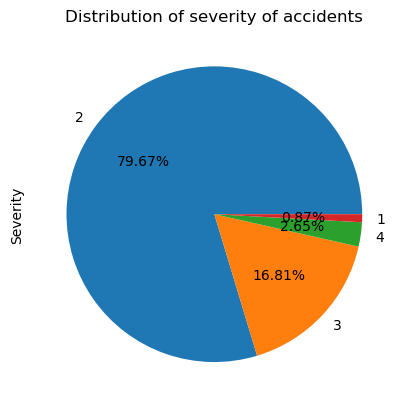

In [11]:
df['Severity'].value_counts().plot(kind = 'pie' , autopct='%0.2f%%')
plt.title('Distribution of severity of accidents')
plt.show()

- The majority of accidents by percentage of 79.67 % are from the second severity while 16.81 % of them are the third severity 
- 5.56 % of accidents are from the fourth severity 
- only 87 % f accidents are from the first severity class

#### City 

In [12]:
df['City'].value_counts()

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

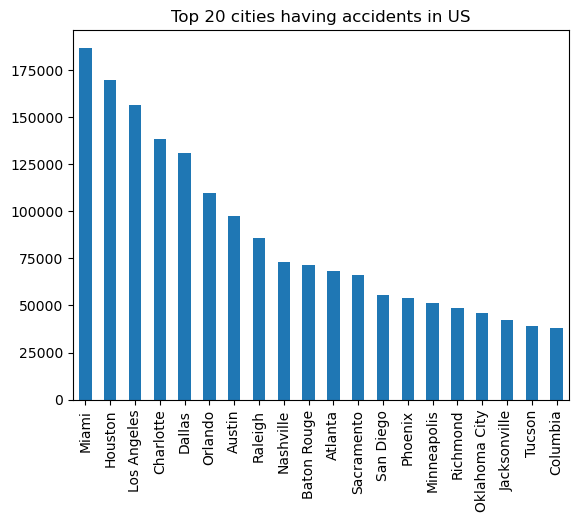

In [13]:
df['City'].value_counts()[0:20].plot(kind = 'bar')
plt.title('Top 20 cities having accidents in US')
plt.show()

Miami is the highest city in accidents and Housten in the second place

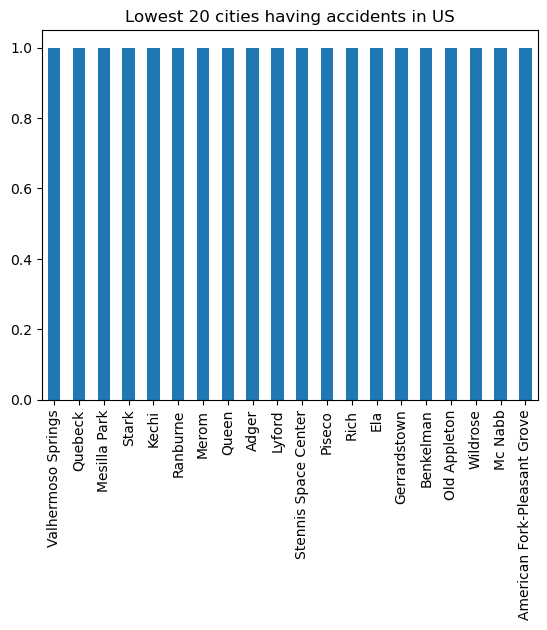

In [14]:
df['City'].value_counts()[-20:].plot(kind = 'bar')
plt.title('Lowest 20 cities having accidents in US')
plt.show()

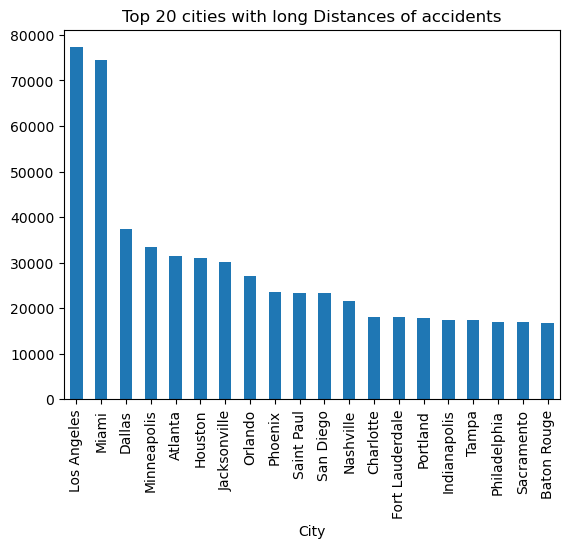

In [17]:
data = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False)[0:20]
data.plot(kind='bar')
plt.title('Top 20 cities with long Distances of accidents')
plt.show()

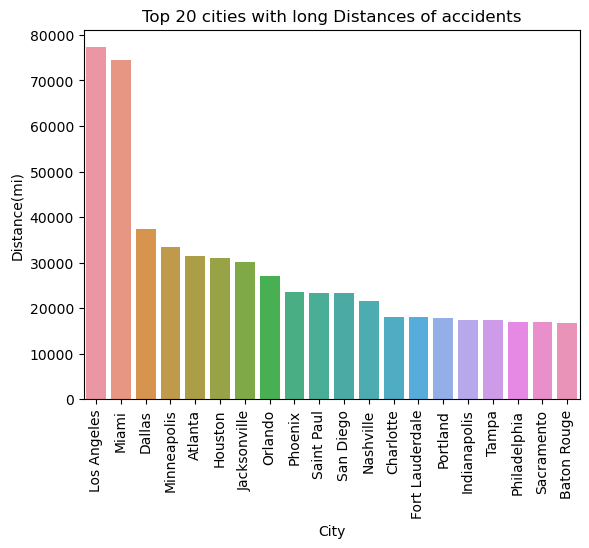

In [23]:
# another code
dt = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False).reset_index()[0:20]
sns.barplot(x='City' , y= 'Distance(mi)' , data = dt)
plt.title('Top 20 cities with long Distances of accidents')
plt.xticks(rotation = 90)
plt.show()

Los Angeles recorded the highest distances of accidents and Miami is the second

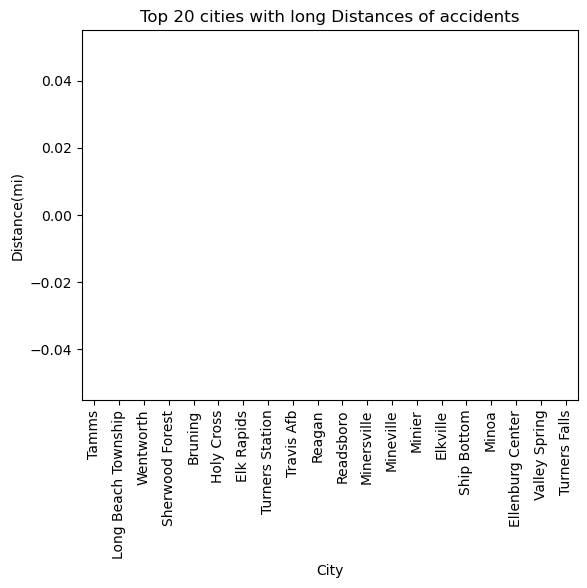

In [24]:
# another code
dt = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False).reset_index()[-20:]
sns.barplot(x='City' , y= 'Distance(mi)' , data = dt)
plt.title('Top 20 cities with long Distances of accidents')
plt.xticks(rotation = 90)
plt.show()

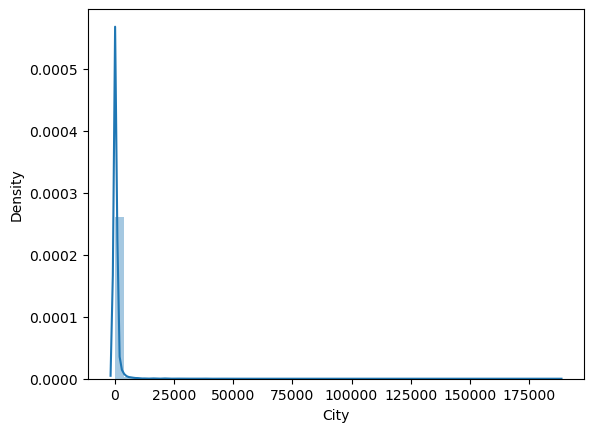

In [25]:
dt = df['City'].value_counts()
sns.distplot(dt)
plt.show()

Most of cities have low numbers of accident while few cities like Miami and Huoston have a very high numbers of accidents

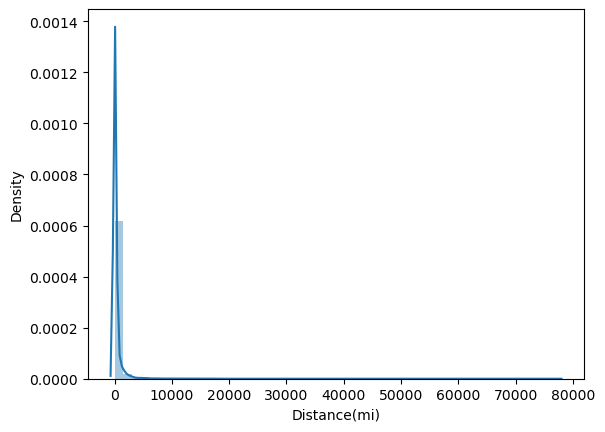

In [26]:
dt = df.groupby('City')['Distance(mi)'].sum().sort_values(ascending=False)
sns.distplot(dt)
plt.show()

Most of cities have a low record distance before accidents while few cities recorded a very high distance

#### start time

In [27]:
df['Start_Time'].value_counts()

2021-01-26 16:16:13    225
2021-01-26 16:17:33    156
2021-02-16 06:42:43    139
2021-11-21 18:37:51    108
2020-12-16 13:53:25     96
                      ... 
2019-04-16 07:29:32      1
2019-04-16 07:26:57      1
2019-04-16 07:27:55      1
2019-04-16 07:25:08      1
2019-08-23 18:52:06      1
Name: Start_Time, Length: 6131796, dtype: int64

In [31]:
df['Start_Time'].dtypes

dtype('O')

In [33]:
# We will convert start time types of data to datetime type to gain insights
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Time'].dtypes

dtype('<M8[ns]')

We converted the data to date time data

In [34]:
df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [35]:
df['Start_Time'].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int64

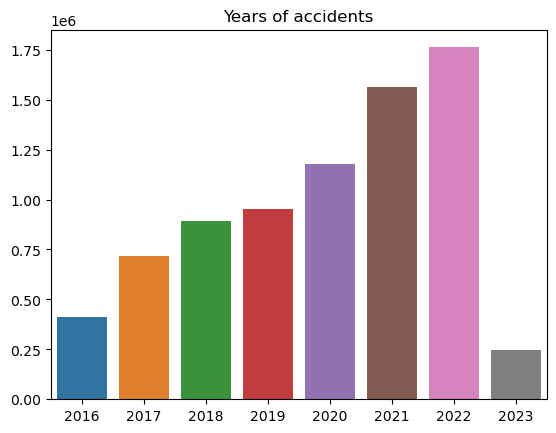

In [36]:
years = df['Start_Time'].dt.year
sns.barplot(x= years.value_counts().index , y=years.value_counts().values)
plt.title('Years of accidents')
plt.show()

- 2022 recorded the higher number of accidents and 2021 is the second
- 2023 recorded the lowest number of accidents

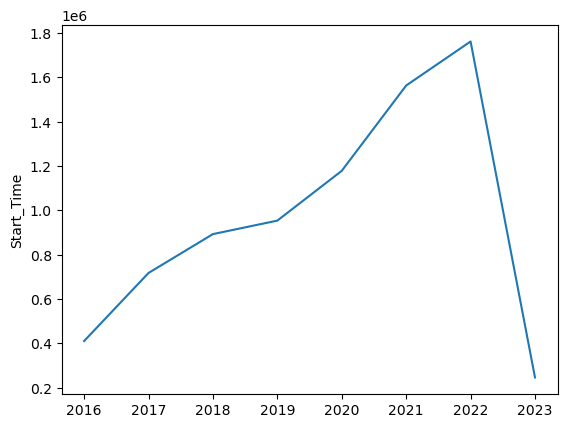

In [39]:
sns.lineplot(df['Start_Time'].dt.year.value_counts())
plt.show()

Number of accidents was highly increasing from 2016 until 2022 and then dropped severily in 2023 which indicates to the high efforts of authorities to face the problem

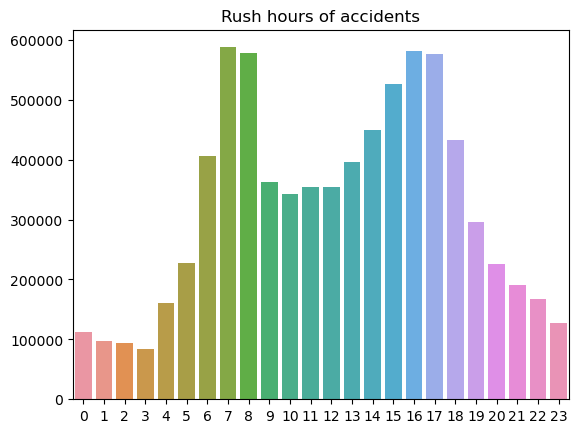

In [42]:
hours = df['Start_Time'].dt.hour.value_counts()
sns.barplot(x= hours.index , y=hours.values)
plt.title('Rush hours of accidents')
plt.show()

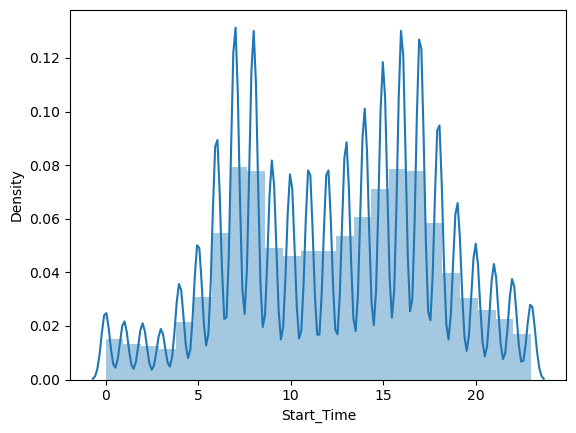

In [45]:
sns.distplot(df['Start_Time'].dt.hour , bins=24)
plt.show()

- most of accidents happened at 7 am
- The rush hours of accidents are between 6 am to 8 am and between 3 pm to 5 pm
- The lowest number of accidents happened at 3 am

In [48]:
df['Start_Time'].dt.dayofweek.value_counts()

4    1366499
3    1316229
2    1312389
1    1290929
0    1210921
5     668683
6     562744
Name: Start_Time, dtype: int64

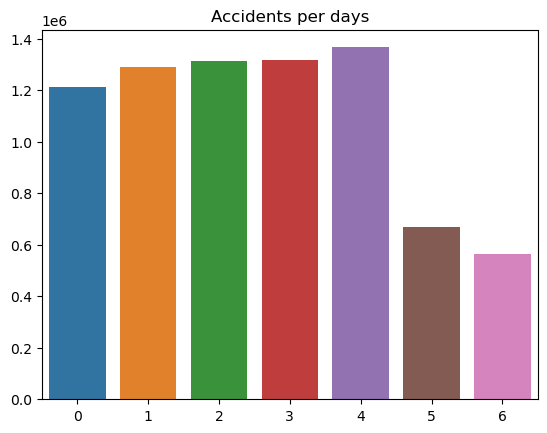

In [54]:
days = df['Start_Time'].dt.dayofweek.value_counts()
sns.barplot(x= days.index , y=days.values )
plt.title('Accidents per days')
plt.show()

- Most of accidents happen on wenesday
- accidents increasing highly from saturday to wendesday
- The lowest number of accidents happen on friday

In [60]:
# Wendesday has the highest number of accidents so we will check when
wendesday = df[ df['Start_Time'].dt.dayofweek == 4]
wendesday

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
122,A-123,Source2,2,2016-02-12 16:16:51,2016-02-12 17:01:51,39.749786,-84.199493,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
123,A-124,Source2,2,2016-02-12 16:42:52,2016-02-12 17:27:52,39.780331,-84.195076,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
124,A-125,Source2,3,2016-02-12 17:47:41,2016-02-12 18:52:13,40.109928,-82.978203,NaN,NaN,1.670,...,False,False,False,False,False,False,Day,Day,Day,Day
125,A-126,Source2,3,2016-02-12 20:04:00,2016-02-12 23:59:00,40.111950,-83.016663,NaN,NaN,0.940,...,False,False,False,False,False,False,Night,Night,Night,Night
126,A-127,Source2,3,2016-02-12 20:12:00,2016-02-12 23:59:00,40.112156,-83.035072,NaN,NaN,0.940,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


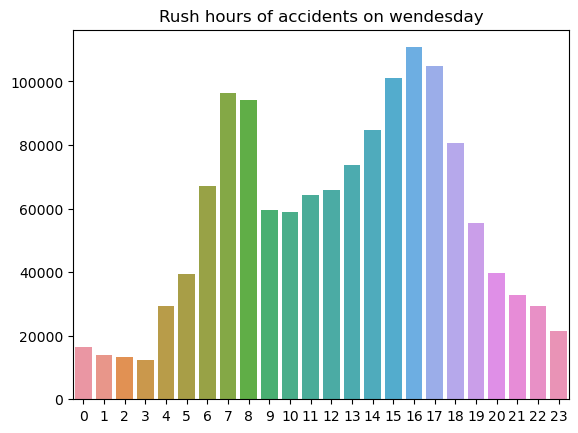

In [61]:
rush = wendesday['Start_Time'].dt.hour.value_counts()
sns.barplot(x= rush.index , y = rush.values)
plt.title('Rush hours of accidents on wendesday')
plt.show()

while wendesday is the highest day in accidents number , the most of accidents happen between 7 am and 8 am in addition, between 2pm to 5pm

#### Time Zone 

In [55]:
df['Timezone'].value_counts()

US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: Timezone, dtype: int64

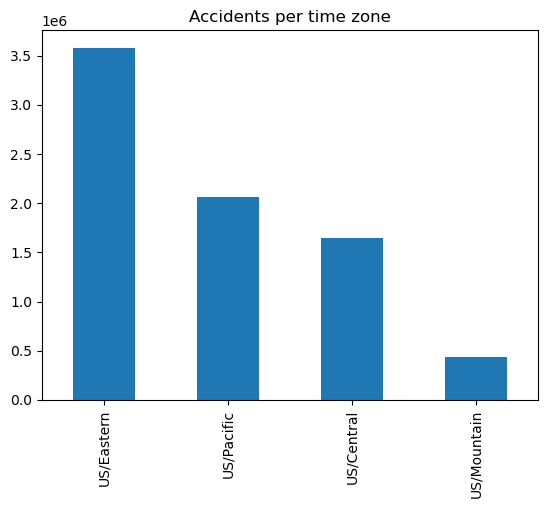

In [57]:
df['Timezone'].value_counts().plot(kind='bar')
plt.title('Accidents per time zone')
plt.show()

Most of accidentes happen at the eastern US while the lowest number of accidents happen at th Mountain region

#### Street 

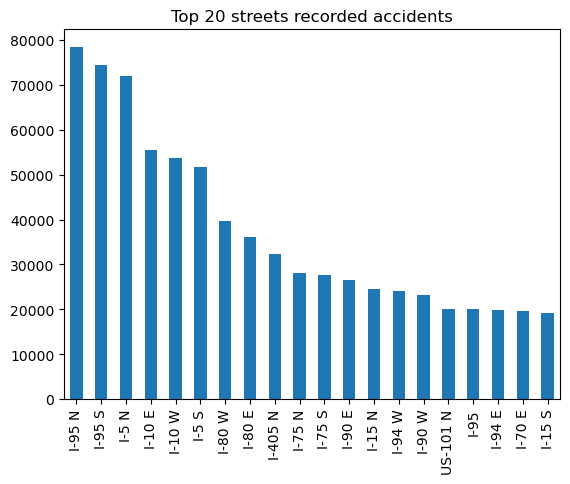

In [58]:
streets = df['Street'].value_counts()[0:20]
streets.plot(kind = 'bar')
plt.title('Top 20 streets recorded accidents')
plt.show()

Street I-95 N recorded the highest number of accidents

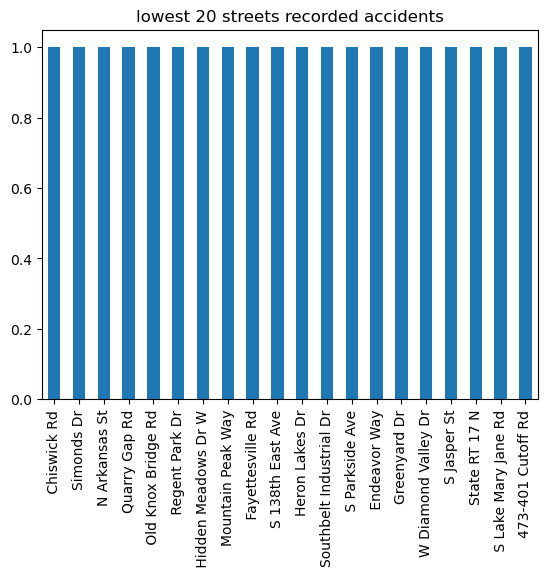

In [59]:
streets = df['Street'].value_counts()[-20:]
streets.plot(kind = 'bar')
plt.title('lowest 20 streets recorded accidents')
plt.show()

#### Temperature(F) 

In [72]:
df['Temperature(F)'].value_counts().head(20)

77.0    170991
73.0    170898
68.0    163767
72.0    160498
75.0    158448
70.0    155568
63.0    149787
59.0    149017
64.0    148466
79.0    147140
66.0    144854
61.0    140366
57.0    134818
81.0    132517
50.0    132335
54.0    129882
82.0    126838
55.0    125909
52.0    116664
84.0    105573
Name: Temperature(F), dtype: int64

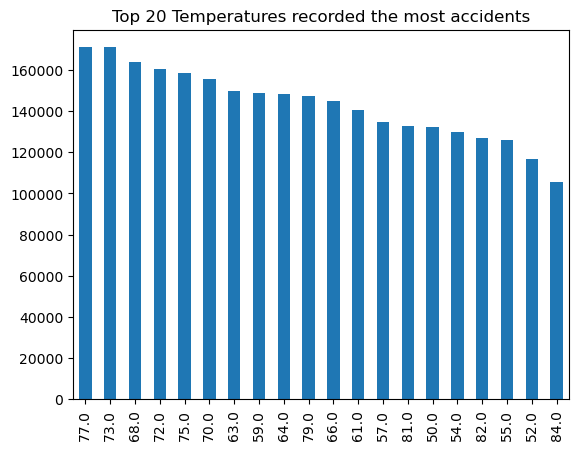

In [73]:
df['Temperature(F)'].value_counts().head(20).plot(kind = 'bar')
plt.title('Top 20 Temperatures recorded the most accidents')
plt.show()

Most of accidents happend at tempreature 77°F

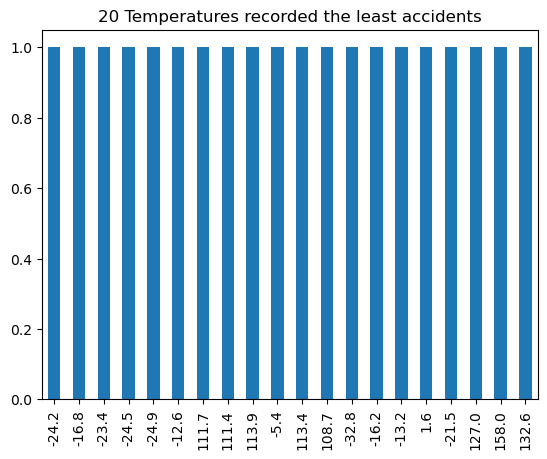

In [74]:
df['Temperature(F)'].value_counts().tail(20).plot(kind = 'bar')
plt.title('20 Temperatures recorded the least accidents')
plt.show()

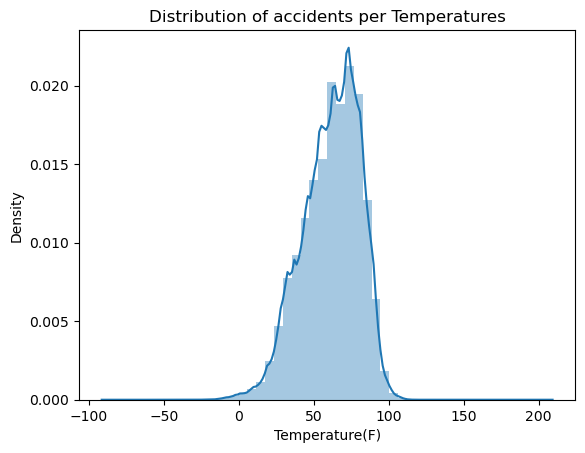

In [81]:
sns.distplot(df['Temperature(F)'])
plt.title('Distribution of accidents per Temperatures')
plt.show()

Most of accidents happened between 60°F and 100°F in summer where temperature is high

#### Humidity(%) 

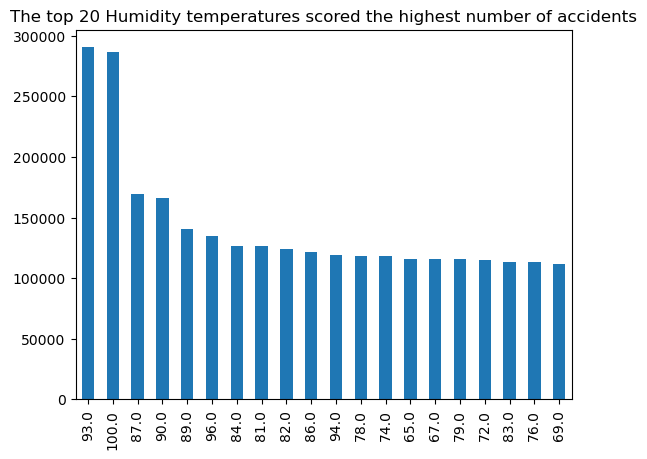

In [77]:
df['Humidity(%)'].value_counts().head(20).plot(kind='bar')
plt.title('The top 20 Humidity temperatures scored the highest number of accidents')
plt.show()

- Most of accidents happened at Humidity of 93 %

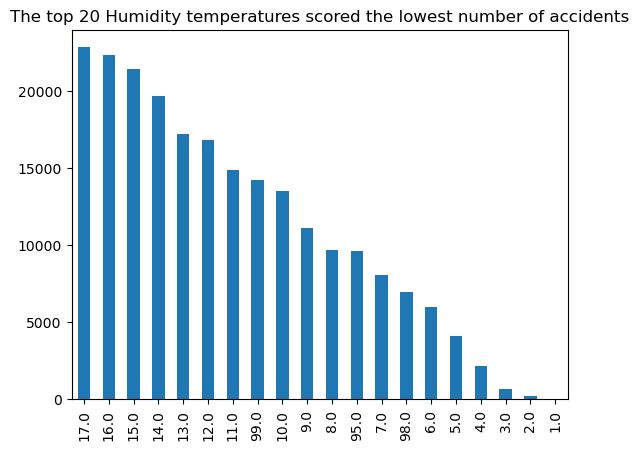

In [76]:
df['Humidity(%)'].value_counts().tail(20).plot(kind='bar')
plt.title('The top 20 Humidity temperatures scored the lowest number of accidents')
plt.show()

The lowest number of accidents happen at a very low humidity in winter

#### Wind_Direction

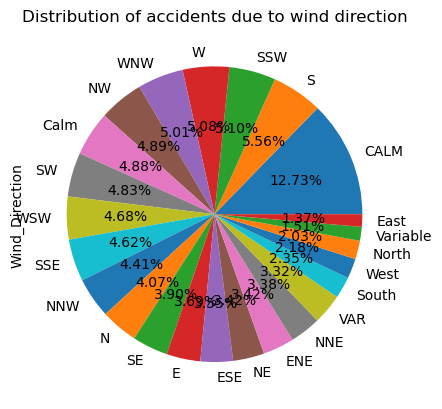

In [80]:
df['Wind_Direction'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
plt.title('Distribution of accidents due to wind direction')
plt.show()

- 12.73 % of accidents happen when wind is calm which is the highest percentage
- The lowest number of accidents happen with east wind direction

#### Temperature per regions

In [82]:
temp = df.groupby('Timezone')['Temperature(F)'].mean()
temp

Timezone
US/Central     60.730387
US/Eastern     62.146114
US/Mountain    58.497216
US/Pacific     62.229420
Name: Temperature(F), dtype: float64

The average temperature in all US along year is higher than 50°F

#### Weather_Condition  

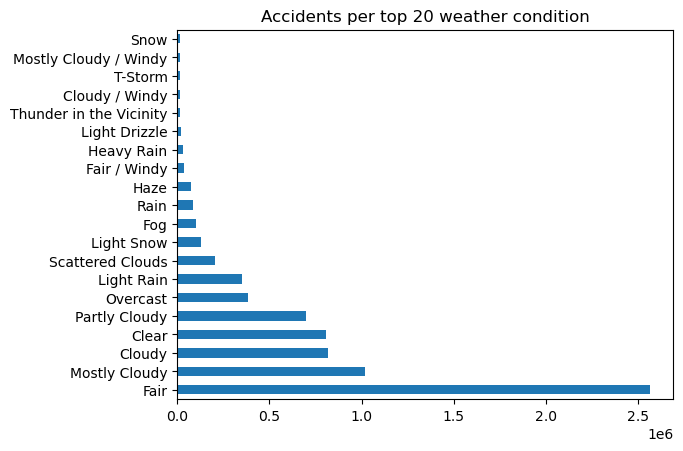

In [89]:
df['Weather_Condition'].value_counts()[0:20].plot(kind = 'barh')
plt.title('Accidents per top 20 weather condition')
plt.show()

In [87]:
df['Weather_Condition'].value_counts()

Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: Weather_Condition, Length: 144, dtype: int64

In [98]:
df['Weather_Condition'].value_counts()[df['Weather_Condition'].value_counts() > 10000]

Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Thunder                      14202
Light Rain with Thunder      13597
Smoke                        12668
Wintry Mix                   11703
Partly Cloudy / Windy        10241
Name: Weather_Condition, dtype: int64

In [101]:
high_perc = df['Weather_Condition'].value_counts()[df['Weather_Condition'].value_counts() > 10000]
high_perc

Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Thunder                      14202
Light Rain with Thunder      13597
Smoke                        12668
Wintry Mix                   11703
Partly Cloudy / Windy        10241
Name: Weather_Condition, dtype: int64

In [104]:
len(high_perc)

25

In [106]:
print((len(high_perc) / len(df['Weather_Condition'].value_counts()))*100)

17.36111111111111


17.36 % of weather condition have scored more than 10000 accidents

#### Sunrise_Sunset

In [109]:
df['Sunrise_Sunset'].value_counts()

Day      5334553
Night    2370595
Name: Sunrise_Sunset, dtype: int64

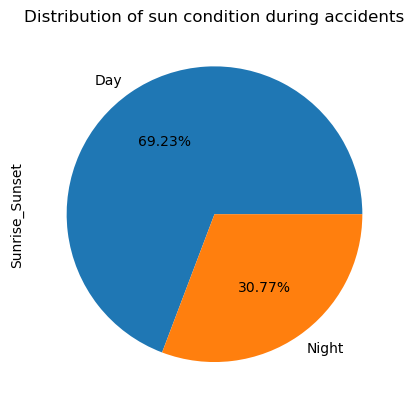

In [110]:
df['Sunrise_Sunset'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
plt.title('Distribution of sun condition during accidents')
plt.show()

69.23 % of accident happened during Day light while 30.77 % of accident happened during the Night

In [117]:
a = df['City'].value_counts()[df['City'].value_counts() > 1000]
b = df['City'].value_counts()
print((len(a)/len(b))*100)

8.882877613686212


### Conclusion 

- The rush hours of accidents are between 6 am to 8 am and between 3 pm to 5 pm when most of accidents happened
- The lowest number of accidents happened at 3 am
- Most of accidents happened at the weekend where they reach the top peak and they increasing gradually form saturday to wednesday
- 8.8 % of cities recorded 1000 accidents per year
- Most of accidents happen at winter
- Most of accidents happen when weather is clear
- Most of accidents happen at the east of USA